In [1]:
import uproot
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import awkward as ak
import numpy as np
from tqdm.auto import tqdm, trange
from matplotlib.ticker import (
    AutoMinorLocator,
    MaxNLocator,
    MultipleLocator,
    FixedLocator,
    FuncFormatter,
)

In [2]:
leds = [0,1,4,9]
sipms = [1,2,3]

1023 entries per window?

In [3]:
data = {}
for sipm in tqdm(sipms):
    for led in tqdm(leds):
        try:
            with uproot.open(f"/Volumes/EXFAT/SoLAr/LED {led}/wave0_{sipm}.root") as f:
                tree = f["T"]
                adc = tree["ADC"].array()
                # head = tree["HEAD"].array()
            
                adc = ak.flatten(adc)[:1023*100_000]
                # head = ak.flatten(head)

                if sipm not in data:
                    data[sipm] = {}
                data[sipm][led]=adc
        except:
            continue

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
peak_adc = {}
for sipm, values in tqdm(data.items()):
    for led, adc in tqdm(values.items()):
        peak_adc[(sipm,led)] = {}
        peak = []
        for i in trange(int(len(adc)/1023)):
            peak += sorted(adc[i*1023:(i+1)*1023], reverse = True)[:3]
            
        peak_adc[(sipm,led)]["mean"] = np.mean(peak)
        peak_adc[(sipm,led)]["std"] = np.std(peak)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/63903 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [5]:
peak_df = pd.DataFrame.from_dict(peak_adc, orient="index")

In [6]:
peak_df

mean        std
1 0  1988.469514  12.606442
  4  2378.915550  70.324737
  9  2220.582880  52.115142
2 0  2275.360450  55.151405
  1  2291.704280  55.003107
  4  2511.351207   2.820873
  9  2972.550740   1.049615
3 0  2318.230010  67.433989
  1  2288.577613  50.765835
  4  2492.733547   3.372183
  9  2965.594897   1.127076

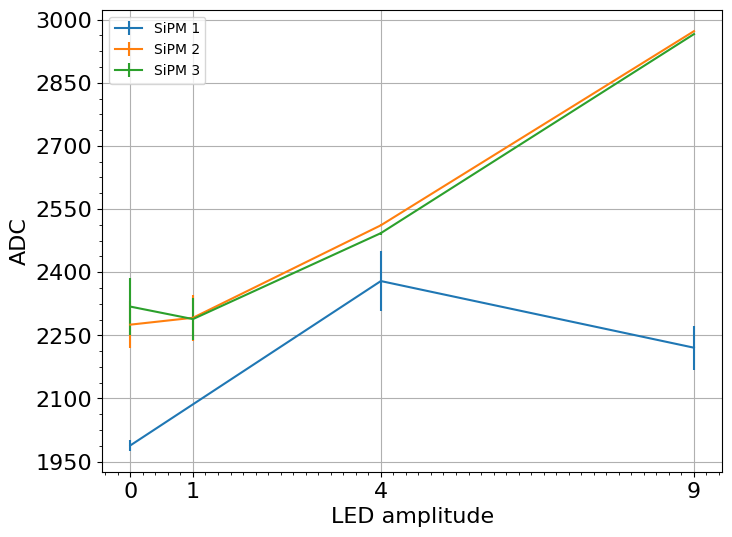

In [7]:
fig, ax = plt.subplots(figsize=(8, 6), ncols=1, nrows=1)

for i,row in peak_df.groupby(level=0):
    row = row.droplevel(0).reset_index()
    ax.errorbar(x=row["index"], y=row["mean"], yerr=row["std"], label = f"SiPM {i}")

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_locator(FixedLocator(leds))
ax.yaxis.set_major_locator(MaxNLocator())
ax.tick_params(axis="both", which="major", labelsize=16)
ax.set_ylabel("ADC", fontsize=16)
ax.set_xlabel("LED amplitude", fontsize=16)

ax.grid()
ax.legend()
plt.show()

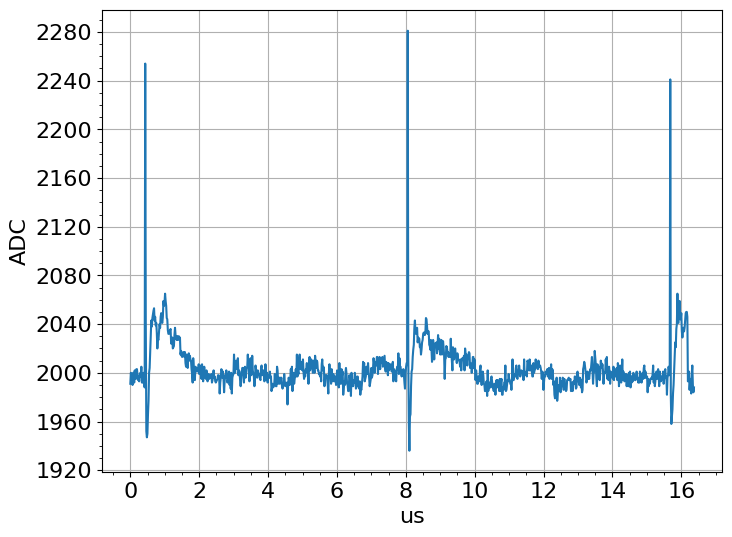

In [13]:
i = 0
# i=int(len(adc)/1023)
# i=1334308

fig, ax = plt.subplots(figsize=(8, 6), ncols=1, nrows=1)

y=data[1][9][i*1023:(i+1)*1023]
# x=np.linspace(0,16,1023)
x=np.linspace(0,1023*16*1e-3,1023)
ax.plot(x,y) 

# scale_x = 500/8
# ticks_x = FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
# ax.xaxis.set_major_formatter(ticks_x)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_locator(MaxNLocator())
ax.yaxis.set_major_locator(MaxNLocator())
ax.tick_params(axis="both", which="major", labelsize=16)
ax.set_ylabel("ADC", fontsize=16)
ax.set_xlabel("us", fontsize=16)

ax.grid()
plt.show()

0.5mV per ADC count?